# **Customer Lifetime Value Prediction** 
Oleh : Shafira Puspa Ardelia

# **Table of Contents**
1.  **Business Problem**
2.  **Data Understanding**
3.  **Data Cleansing**
4.  **EDA**
5.  **Modeling**
6.  **Kesimpulan**
7.  **Rekomendasi**

# 1.Business Problem
Rumusan Masalah Bisnis: Prediksi Customer Lifetime Value (CLV) dalam Industri Asuransi

Dalam industri asuransi non-jiwa yang sangat kompetitif, memahami nilai jangka panjang dari setiap pelanggan menjadi krusial untuk menjaga profitabilitas dan efisiensi bisnis. Salah satu metrik utama yang merepresentasikan hal ini adalah **Customer Lifetime Value (CLV)** — yakni estimasi nilai finansial yang dapat diperoleh perusahaan dari seorang pelanggan selama masa hubungan mereka.

---

## Permasalahan yang Dihadapi Stakeholder
**Stakeholder utama** dalam konteks ini adalah perusahaan asuransi, khususnya tim manajemen, pemasaran, dan retensi pelanggan. Mereka menghadapi tantangan dalam:

- Mengidentifikasi pelanggan bernilai tinggi  
- Mengalokasikan anggaran pemasaran dan retensi secara optimal  
- Memprediksi risiko kehilangan pelanggan yang sebenarnya sangat menguntungkan

Tanpa pemahaman yang akurat tentang CLV, keputusan bisnis sering kali berbasis intuisi, bukan data, yang berpotensi menyebabkan **kerugian finansial jangka panjang**.

---

## Mengapa Masalah Ini Penting?

Keputusan yang tidak mempertimbangkan nilai seumur hidup pelanggan dapat berdampak pada:

- Tingginya biaya akuisisi untuk pelanggan bernilai rendah  
- Churn rate pelanggan potensial tinggi karena strategi retensi yang salah sasaran  
- Rendahnya efisiensi kampanye pemasaran  

Dalam jangka panjang, hal ini akan merugikan baik dari segi **cost-efficiency** maupun **customer loyalty**.

---

## Tujuan dan Solusi

Proyek ini bertujuan untuk membangun **model prediktif CLV berbasis machine learning** dengan memanfaatkan data historis pelanggan, termasuk demografi, informasi polis, premi, dan riwayat klaim. Model ini tidak hanya berfungsi sebagai alat prediksi, tetapi juga memberikan wawasan strategis melalui:

- **Feature importance** untuk mengidentifikasi faktor-faktor utama yang memengaruhi CLV  
- **Simulasi kerugian** akibat kesalahan strategi jika CLV tidak dipertimbangkan dalam pengambilan keputusan

---

## Dampak Solusi terhadap Stakeholder

Model CLV ini akan digunakan oleh tim pemasaran dan manajemen untuk:

- Menentukan prioritas pelanggan dalam program retensi  
- Menyesuaikan penawaran produk dan premi sesuai nilai pelanggan  
- Mengoptimalkan strategi akuisisi untuk fokus pada segmen yang paling menguntungkan  

Dengan demikian, model ini membantu perusahaan mencapai target bisnisnya secara lebih **presisi**, **efisien**, dan **berbasis data**.


## Dampak Finansial Jika Customer Lifetime Value (CLV) Tidak Dinilai dengan Benar

Perusahaan asuransi yang tidak menghitung CLV dengan benar berisiko salah dalam pengambilan keputusan retensi pelanggan — contohnya, mengalokasikan dana secara merata tanpa melihat nilai pelanggan. Berikut simulasi kerugiannya:

---

**Asumsi Skenario**

| Kategori Pelanggan | Jumlah | CLV per Pelanggan | Total CLV     |
|--------------------|--------|-------------------|---------------|
| Tinggi             | 1.000  | $5.000            | $5.000.000    |
| Sedang             | 3.000  | $2.000            | $6.000.000    |
| Rendah             | 6.000  | $500              | $3.000.000    |
| **Total**          | 10.000 | -                 | **$14.000.000** |

---
**Skema Retensi Berbasis CLV (Optimal)**

| Kategori | Budget/Customer | Retained (%) | Retained CLV         |
|----------|------------------|--------------|-----------------------|
| Tinggi   | $100             | 90%          | 900 x $5,000 = $4.5M  |
| Sedang   | $50              | 70%          | 2100 x $2,000 = $4.2M |
| Rendah   | $10              | 20%          | 1200 x $500 = $0.6M   |
| **Total Retained CLV** |      |              | **$9.3M**             |

---
**Retensi Tanpa Penilaian CLV (Salah Sasaran)**

| Kategori | Budget/Customer | Retained (%) | Retained CLV         |
|----------|------------------|--------------|-----------------------|
| Tinggi   | $30              | 50%          | 500 x $5,000 = $2.5M  |
| Sedang   | $30              | 50%          | 1500 x $2,000 = $3.0M |
| Rendah   | $30              | 50%          | 3000 x $500 = $1.5M   |
| **Total Retained CLV** |      |              | **$7.0M**             |

---

**Kerugian Finansial**

**$9.3M (optimal) − $7.0M (tanpa CLV) = $2.3M rugi**

---

**Kesimpulan**

> Tanpa memahami CLV, perusahaan bisa kehilangan **jutaan dolar** karena salah mengalokasikan dana retensi dan gagal mempertahankan pelanggan paling berharga.


# 2.Data Understanding

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#data splitting
from sklearn.model_selection import train_test_split
#scaling
from sklearn.preprocessing import RobustScaler
#encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder

#column transformer
from sklearn.compose import ColumnTransformer
#pipeline (menggabungkan beberapa tahapan jadi 1)
from sklearn.pipeline import Pipeline
#cross validation
from sklearn.model_selection import cross_val_score
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV,cross_validate
#model machine learning
import statsmodels.api as sm # model interpretation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
#evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, mean_squared_error,mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from category_encoders import OrdinalEncoder as CEOrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


import xgboost as xgb 
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [16]:
df= pd.read_csv("data_customer_lifetime_value (1).csv")

In [17]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492



## Penjelasan Kolom Dataset Customer Lifetime Value (CLV)

Dataset ini umumnya digunakan dalam industri asuransi untuk menganalisis dan memprediksi nilai seumur hidup pelanggan(CLV). Dalam Dataset ini, nilai seumur hidup pelanggan merupakan variabel target. Terdapat beberapa kolom lain yang digunakana sebagai feature dalam dataset ini.

## Asal dan Aksesibilitas Data
- **Sumber Data:** Dataset bersumber dari sistem internal perusahaan asuransi atau sumber publik seperti Kaggle yang mensimulasikan data industri asuransi.
- **Aksesibilitas:** Data tersedia dalam format CSV dan dapat diakses melalui repositori proyek atau basis data internal. Struktur data cukup rapi dan tidak memerlukan pembersihan besar.

Berikut penjelasan tiap kolomnya:

| **Kolom**                  | **Deskripsi** |
|---------------------------|---------------|
| `Vehicle Class`           | Kategori kendaraan yang dimiliki oleh pelanggan, seperti `Two-Door Car`, `Four-Door Car`, `SUV`, `Luxury SUV`, dan `Luxury Car` |
| `Coverage`                | Jenis cakupan asuransi yang dipilih oleh pelanggan. Contoh nilai: `Basic`, `Extended`, `Premium` |
| `Renew Offer Type`        | Jenis penawaran yang diberikan saat pembaruan polis. Contoh nilai: `Offer 1`, `Offer 2`, dst.|
| `Employment Status`       | Status pekerjaan pelanggan, seperti `Employed`, `Unemployed`, `Medical Leave`, atau `Retired`|
| `Marital Status`          | Status pernikahan pelanggan, misalnya `Married`, `Single`, `Divorced` |
| `Education`               | Tingkat pendidikan pelanggan, seperti `High School`, `Bachelor`, `Master`, `Doctor` |
| `Number of Policies`      | Jumlah polis asuransi aktif yang dimiliki oleh pelanggan.|
| `Monthly Premium Auto`    | Jumlah premi bulanan yang dibayarkan oleh pelanggan untuk asuransi kendaraan|
| `Total Claim Amount`      | Jumlah total klaim yang diajukan pelanggan|
| `Income`                  | Pendapatan tahunan pelanggan|
| `Customer Lifetime Value` | Total nilai yang diperkirakan akan dihasilkan pelanggan selama masa hubungan mereka dengan perusahaan. Ini adalah target utama dalam analisis CLV. |


Pemodelan ini menggunakan regresi, regresi dipilih karena:
- Target variabel adalah angka (numerik kontinu)
- Tujuan prediksi adalah estimasi nilai, bukan klasifikasi
- Regresi memungkinkan interpretasi dan prediksi yang relevan secara bisnis



**Evaluasi Metrik Regresi**

Setelah membangun model regresi untuk memprediksi **Customer Lifetime Value (CLV)**, langkah penting berikutnya adalah **mengevaluasi kinerja model**. Evaluasi ini dilakukan dengan menggunakan **metrik regresi**, yang dirancang khusus untuk mengukur **seberapa dekat hasil prediksi dengan nilai aktual** dalam masalah regresi

Berikut adalah penjelasan metrik evaluasi yang umum digunakan untuk model regresi:

1. MAE (Mean Absolute Error)
**Rumus**:  
`MAE = (1/n) * Σ|y_actual - y_predicted|`

**Penjelasan**:  
- Mengukur **rata-rata kesalahan absolut** antara nilai aktual dan prediksi.
- Tidak menghukum kesalahan besar secara berlebihan (karena tidak ada kuadrat).
- Nilai **semakin kecil semakin baik** (0 = prediksi sempurna).
- Satuan sama dengan variabel target.

**Kelebihan**:  
- Mudah diinterpretasi (deviasi rata-rata dalam satuan asli).  
- Robust terhadap outlier.  

**Kekurangan**:  
- Tidak memberi informasi tentang arah kesalahan (over/under-prediction).  

---

2. MAPE (Mean Absolute Percentage Error)
**Rumus**:  
`MAPE = (1/n) * Σ(|y_actual - y_predicted| / |y_actual|) * 100%`

**Penjelasan**:  
- Mengukur **persentase kesalahan relatif** terhadap nilai aktual.
- Nilai dinyatakan dalam **persentase** (contoh: MAPE 5% = rata-rata kesalahan 5% dari nilai sebenarnya).
- **Semakin kecil semakin baik** (0% = prediksi sempurna).

**Kelebihan**:  
- Mudah dipahami karena dalam persentase.  
- Berguna untuk membandingkan model pada skala data berbeda.  

**Kekurangan**:  
- Tidak terdefinisi jika ada nilai aktual = 0.  
- Memberi penalti besar pada under-prediction jika nilai aktual kecil.  

---

3. RMSE (Root Mean Squared Error)
**Rumus**:  
`RMSE = √[(1/n) * Σ(y_actual - y_predicted)²]`

**Penjelasan**:  
- Mengukur **akar rata-rata kuadrat kesalahan**.
- **Memberi penalti lebih besar pada kesalahan besar** (karena fungsi kuadrat).
- Nilai **semakin kecil semakin baik** (0 = prediksi sempurna).
- Satuan sama dengan variabel target.

**Kelebihan**:  
- Sensitif terhadap outlier (baik untuk mendeteksi kesalahan besar).  
- Digunakan secara luas di kompetisi ML.  

**Kekurangan**:  
- Tidak mudah diinterpretasi langsung seperti MAE.  

---

4. R² (R-Squared / Koefisien Determinasi)
**Rumus**:  
`R² = 1 - (Σ(y_actual - y_predicted)² / Σ(y_actual - y_mean)²)`

**Penjelasan**:  
- Mengukur **proporsi variabilitas data yang dijelaskan oleh model**.
- Rentang nilai: **-∞ hingga 1** (1 = model sempurna, 0 = model sama baiknya dengan rata-rata, negatif = model lebih buruk dari rata-rata).
- Tidak memiliki satuan (skala invariabel).

**Kelebihan**:  
- Menunjukkan seberapa baik model dibanding baseline (mean).  
- Cocok untuk membandingkan model berbeda.  

**Kekurangan**:  
- Tidak menunjukkan besaran kesalahan absolut.  
- Bisa meningkat palsu jika menambah variabel tidak relevan.  

---

Ringkasan Perbandingan
| Metrik  | Ideal | Sensitif terhadap Outlier | Satuan           | Keunggulan                          |
|---------|-------|---------------------------|------------------|-------------------------------------|
| MAE     | 0     | Tidak                     | Asli (target)    | Interpretasi mudah                  |
| MAPE    | 0%    | Tidak                     | Persentase       | Perbandingan antar dataset          |
| RMSE    | 0     | Ya                        | Asli (target)    | Fokus pada kesalahan besar          |
| R²      | 1     | Tidak                     | Tanpa satuan     | Ukuran goodness-of-fit              |

**Pada permodelan ini akan difokuskan pada nilai MAE dan MAPE dikarenakan mudah di interpretasikan dan robust terhadap outlier**

# 3. Data Cleansing

## Missing value

In [18]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

insight: Tidak ada nilai kosong didalam data sehingga tidak dilakukan pengisian missing value

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Insight: Data CLV memiliki 11 kolom dengan 6 kolom tipe object dan 5 kolom numerik. Data tersebut berisikan 5669 baris dan tidak memiliki nilai kosong.

## Duplikasi data

In [20]:
df.duplicated().sum()

618

In [21]:
df.drop_duplicates(inplace= True)

In [22]:
df.shape

(5051, 11)

insight: Dilakukan drop duplikat karena dengan asumsi tidak ada pelanggan yang benar benar identik. Jumlah baris setelah dilakukan drop duplikat hanya tinggal 5051 baris.

# 4. EDA

## Analisis kolom numerik

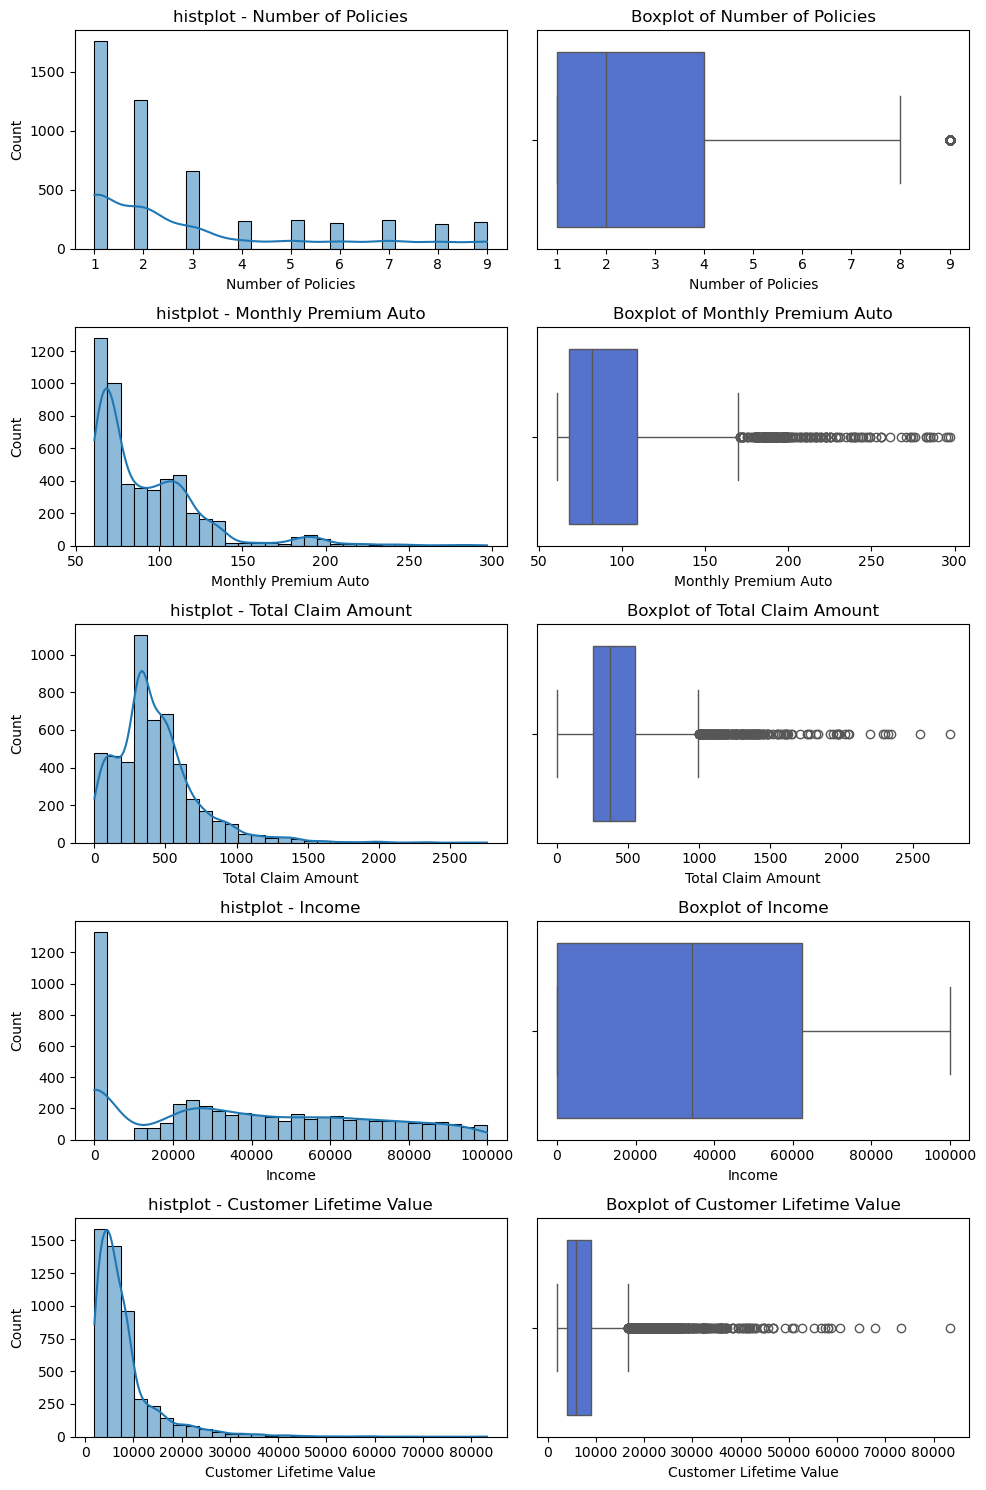

In [23]:
# Boxplots untuk semua kolom numerik
numerical_columns = ['Number of Policies','Monthly Premium Auto','Total Claim Amount','Income','Customer Lifetime Value']

plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, i * 2 + 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'histplot - {col}')
    plt.subplot(len(numerical_columns), 2, i *2 + 2)
    sns.boxplot(x=df[col], color='royalblue')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

insight: 
Bila dilihat dari grafik setiap kolom tidak terdistribusi normal. Setiap kolom cenderung right skewed yang artinya data cenderung banyak didata kecil dan terdapat outlier didata yang besar. 
Outlier pada data besar tersebut dapat dikatakan masuk akal:
- Kolom `Monthly Premium Auto` memiliki beberapa data besar karena premi yang dibayarkan pelanggan berbeda 
- Kolom `Total Claim Amount` memiliki beberapa data besar karena claim asuransi yang diajukan pelanggan berbeda
- Kolom `Income` memiliki beberapa data besar karena gaji setiap pelanggan berbeda
- Kolom `Customer Lifetime Value` yang akan diprediksi memiliki beberapa data besar namun tetap masuk akal dan tidak anomali. Kolom ini akan dijadikan terget prediksi dengan melihat beberapa feature yang ada

In [24]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


insight: 
- Jumlah maksimal polis asuransi aktif yang dimiliki oleh pelanggan sebanyak 9 polis dan jumlah minimal sebanyak 1 polis. 
- Biaya premi yang dibayarkan pelanggan minimal 61 dolar dan maksimal 297 dolar. 
- Besaran asuransi yang ditarik oleh pelanggan paling kecil 0.4 dollar dan paling besar 2.759 dolar. 
- Pendapatan minimal pelanggan 0 dolar dan pendapatan maksimal 99.934 dollar. 
- Besarnya Customer Lifetime Value minimal 1.989 dollar dan maksimal 83.325 dollar. 

**Pengecekan data anomali atau outlier**

In [25]:
income_0 =df[df['Income']==0]
income_0.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
16,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,7.0,64.0,307.200000,0.0,4774.751709
17,SUV,Extended,Offer1,Unemployed,Single,College,1.0,129.0,1178.950186,0.0,4711.845199
21,SUV,Extended,Offer4,Unemployed,Single,Bachelor,1.0,126.0,907.200000,0.0,4531.675269
24,Two-Door Car,Extended,Offer1,Unemployed,Divorced,Bachelor,5.0,95.0,456.000000,0.0,6846.150323
26,Four-Door Car,Basic,Offer4,Unemployed,Single,Bachelor,1.0,66.0,475.200000,0.0,2239.647297


In [26]:
income_0['EmploymentStatus'].unique()

array(['Unemployed'], dtype=object)

insight: Pelanggan yang pendapatannya 0 dollar semuanya tidak memiliki pekerjaan. Kemungkinan terbesar pihak lain yang membayar asuransi mereka

In [27]:
df[df['Customer Lifetime Value']> 70000]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
1091,Luxury Car,Extended,Offer1,Employed,Married,High School or Below,2.0,231.0,1108.8,58958.0,83325.38119
1311,Luxury SUV,Extended,Offer1,Employed,Married,Bachelor,2.0,202.0,969.6,39547.0,73225.95652


Anomali data besar 
terlihat bahwa data besar untuk setiap kolomnya sangat realitis. contoh  pelanggan dengan nilai Customer Lifetime Value besar cenderung memiliki income yang besar dan membayar premi perbulan cukup besar

In [28]:
df[df['Customer Lifetime Value']< 2000]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
998,Two-Door Car,Basic,Offer3,Unemployed,Single,College,1.0,70.0,702.020904,0.0,1898.683686
1072,Two-Door Car,Basic,Offer3,Unemployed,Single,High School or Below,1.0,66.0,475.200000,0.0,1940.981221
2082,Two-Door Car,Basic,Offer1,Unemployed,Single,College,1.0,61.0,439.200000,0.0,1918.119700
2125,Four-Door Car,Basic,Offer1,Unemployed,Single,Bachelor,1.0,63.0,302.400000,0.0,1904.000852
4886,Two-Door Car,Basic,Offer1,Unemployed,Single,Bachelor,1.0,67.0,413.606733,0.0,1898.007675


Terlihat bahwa data dengan 	Customer Lifetime Value kecil cenderung memiliki income yang kecil dan membayar premi perbulan cukup kecil

In [29]:
df[df['Total Claim Amount']<5.0]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
971,SUV,Premium,Offer1,Disabled,Married,Doctor,3.0,172.0,0.517753,10105.0,12819.102890
1016,Four-Door Car,Basic,Offer3,Employed,Married,Doctor,1.0,62.0,0.887629,45855.0,2494.869528
1519,Four-Door Car,Basic,Offer2,Employed,Married,Bachelor,3.0,62.0,2.964380,21907.0,4916.577034
1668,Four-Door Car,Basic,Offer2,Employed,Married,Doctor,7.0,65.0,4.619402,69991.0,5214.342348
1732,Four-Door Car,Extended,Offer4,Employed,Married,College,2.0,96.0,4.334425,84581.0,15435.688820
3398,Four-Door Car,Extended,Offer1,Employed,Married,Bachelor,4.0,92.0,4.216231,62338.0,7326.544855
3463,Four-Door Car,Basic,Offer1,Employed,Married,College,3.0,74.0,2.173552,55393.0,5903.612641
3475,Two-Door Car,Basic,Offer4,Employed,Married,Bachelor,1.0,67.0,2.028223,26094.0,2619.865336
3682,Luxury SUV,Basic,Offer1,Employed,Married,High School or Below,6.0,185.0,1.587888,91193.0,14886.706020
3703,SUV,Basic,Offer1,Employed,Married,Bachelor,9.0,105.0,2.540090,61337.0,8447.888167


Klaim asuransi di bawah $10 memang tidak lazim, tapi bisa terjadi dalam konteks tertentu. Berikut adalah beberapa alasan yang masuk akal dan realistis mengapa bisa muncul klaim kecil (misalnya < $10):
- Pembagian klaim kolektif
- Penyesuaian atau cashback
- Asuransi mikro atau parametrik

Data tersebut tetap dipakai dengan asumsi adanya konteks tertentu yang menyebabkan claim asuransi kecil.

In [30]:
df.select_dtypes(include=['float64']).corr(method = 'spearman')



,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
Number of Policies,1.000000,0.025298,-0.002421,-0.006359,0.487067
Monthly Premium Auto,0.025298,1.000000,0.519520,-0.025358,0.466094
Total Claim Amount,-0.002421,0.519520,1.000000,-0.407472,0.191421
Income,-0.006359,-0.025358,-0.407472,1.000000,0.062807
Customer Lifetime Value,0.487067,0.466094,0.191421,0.062807,1.000000



Berdasarkan analisis korelasi spearman:

1. **Number of Policies** (`r = 0.487`) 
   - Memiliki korelasi positif sedang terhadap CLV.
   - Pelanggan dengan lebih banyak polis cenderung memiliki nilai CLV yang lebih tinggi.
   - *Insight:* Peluang untuk strategi **cross-selling**.

2. **Monthly Premium Auto** (`r = 0.466`) 
   - Korelasi positif sedang terhadap CLV.
   - Pelanggan dengan premi bulanan lebih tinggi cenderung lebih bernilai.
   - *Insight:* Bisa menjadi indikator pelanggan loyal atau high-value.

3. **Total Claim Amount** (`r = 0.191`) 
   - Korelasi positif lemah.
   - Jumlah klaim tidak terlalu berpengaruh terhadap CLV secara signifikan.

4. **Income** (`r = 0.0628`) 
   - Korelasi sangat lemah positif.
   - Pendapatan bukan faktor utama dalam menentukan CLV pada dataset ini.

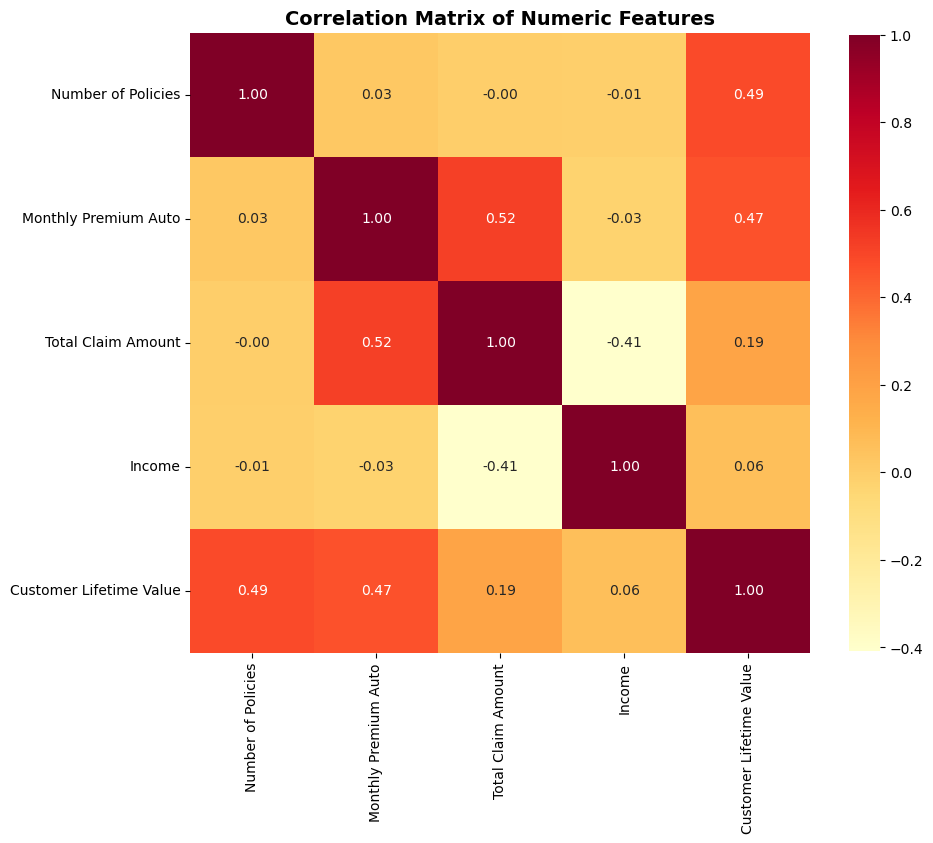

In [31]:
# Set up the matplotlib figure with a 2x2 grid
plt.figure(figsize=(10, 10))
numerical_columns = df.select_dtypes(include=['float64'])
# Calculate the correlation matrix

correlation_matrix = numerical_columns.corr(method='spearman')

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlOrRd', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Matrix of Numeric Features', fontsize=14, fontweight = 'bold')

# Show the plot
plt.show()

insight: 
- Fokus utama untuk prediksi CLV dapat diletakkan pada variabel Number of Policies dan Monthly Premium Auto karena kontribusinya cukup signifikan terhadap nilai CLV.
- Variabel seperti Income dan Total Claim Amount tampaknya memiliki pengaruh kecil terhadap CLV dalam konteks data ini.

## Analisis kolom kategori

In [32]:
# Menampilkan data unique setiap kolom

pd.set_option('display.max_colwidth', None)

categorical_colom = df.select_dtypes(include=['object'])

list_item = []
for col in categorical_colom.columns :
    list_item.append( [col, categorical_colom[col].nunique(), categorical_colom[col].unique()])

tabel_desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)
tabel_desc

,Column Name,Number of Unique,Unique Sample
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,3,"[Divorced, Married, Single]"
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]"


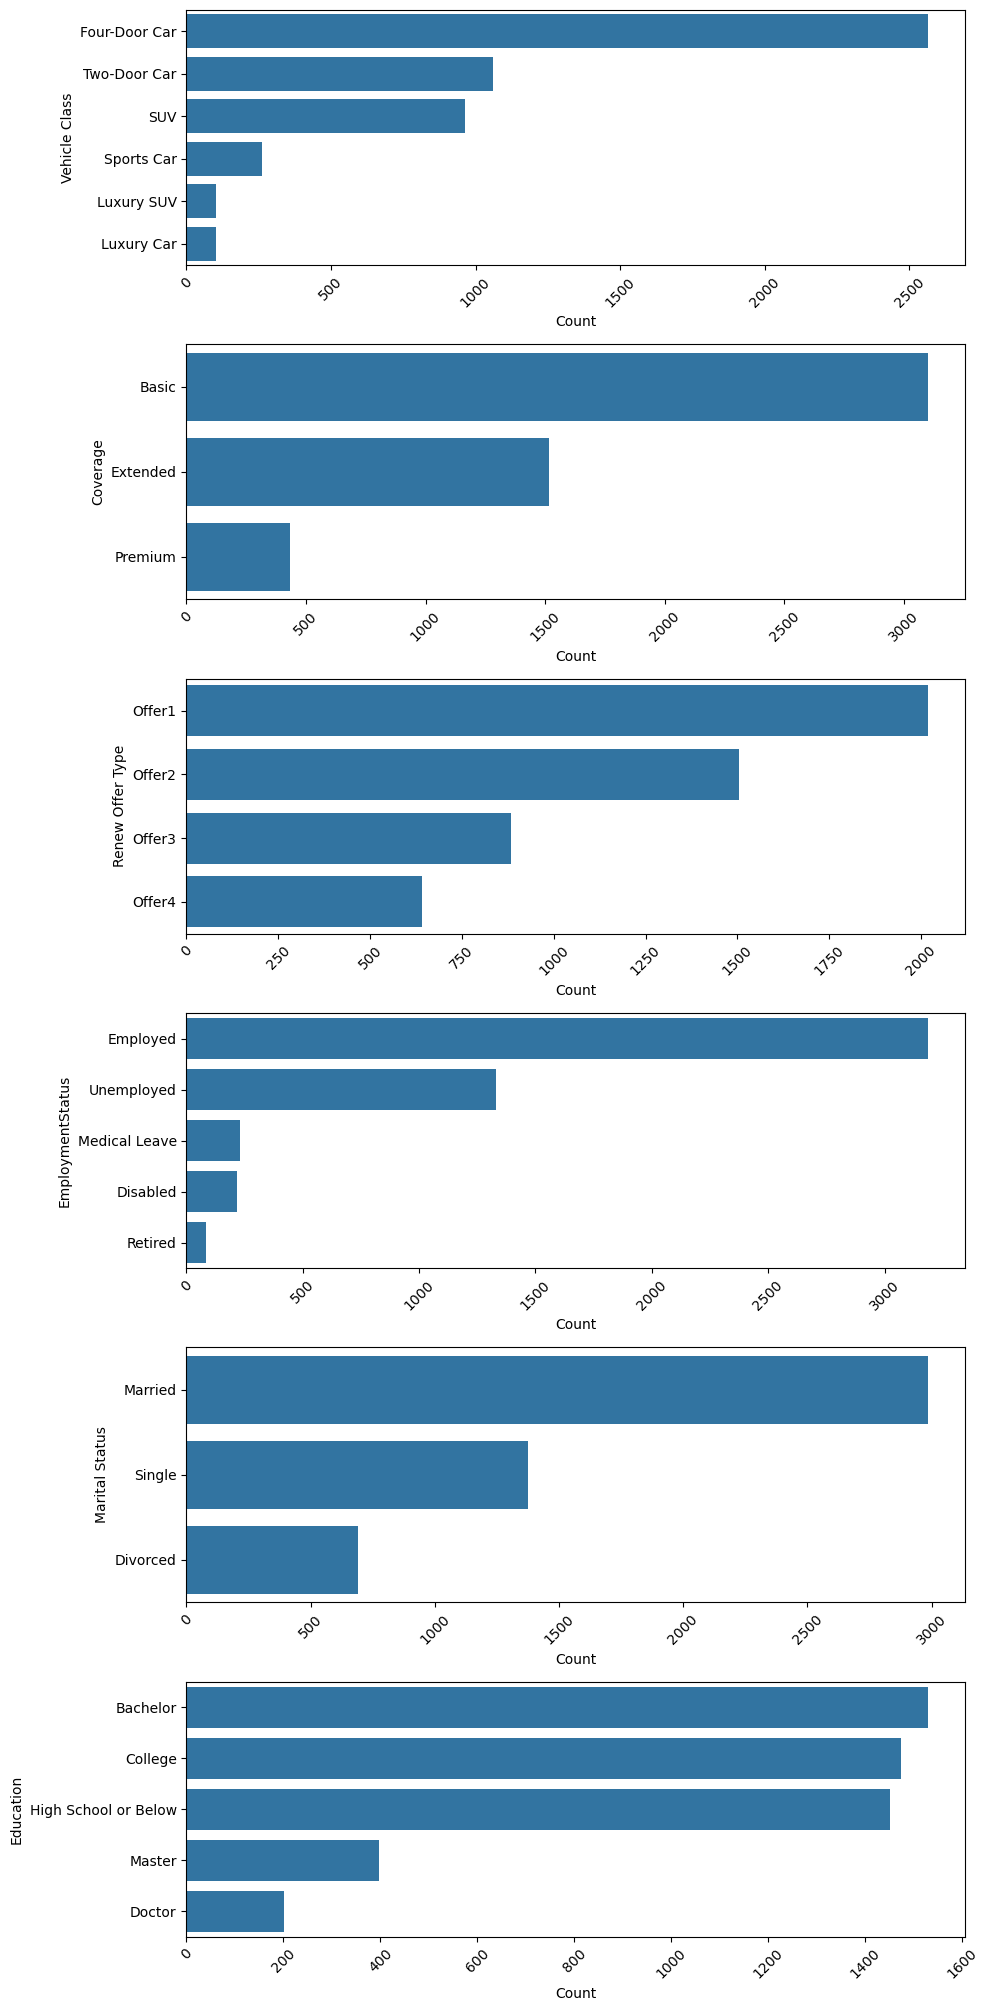

In [33]:

plt.figure(figsize=(10,20))
kat= ['Vehicle Class','Coverage','Renew Offer Type','EmploymentStatus','Marital Status','Education']

for i,col in enumerate(kat, 1):
    plt.subplot(len(kat), 1, i)
    sns.countplot(data = df, y = col, order=df[col].value_counts().index, orient= 'h')
    plt.tight_layout()
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.xticks(rotation=45)

insight: 
Dari keenam kolom kategorik. Pengguna asuransi terbanyak memiliki tipe mobil 4 pintu, jenis asuransi `coverage` basic, dan jenis penawaran yang paling banyaka diambil adalah offer 1. Identitas mayoritas pengguna asuransi adalah seorang pekerja, seorang yang menikah dan seorang sarjana.

Dari keenam kolom kategori, pelanggan hanya dapat memilih kolom `Coverage` dan `Renew Offer Type`. Kolom `coverage` menunjukan jenis suransi yang dipilih pelanggan. Analisis lanjut akan berpatok pada jenis `Coverage` agar perusahaan dapat mengetahui hubungan jenis auransi dengan nilai `customer lifetime value`. 

In [34]:
df.groupby('Coverage')[['Customer Lifetime Value']].median().sort_values('Customer Lifetime Value', ascending= False)

,Customer Lifetime Value
Coverage,
Premium,8688.813000
Extended,6727.617003
Basic,5282.937237


Basic vs Premium: Pelanggan dengan polis Premium secara alami membayar premi lebih tinggi, sehingga kontribusi pendapatan jangka panjangnya lebih besar.

In [35]:
from scipy.stats import kruskal
stat, pvalue = kruskal(
    df[df['Coverage']=='Basic']['Customer Lifetime Value'],
    df[df['Coverage']=='Extended']['Customer Lifetime Value'],
    df[df['Coverage']=='Premium']['Customer Lifetime Value']
)

# conclusion

if pvalue <= 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue < 0.05. Tolak H0. 
    Ada perbedaan signifikan dalam nilai CLV setidaknya satu kelompok dari Coverage yang mempengaruhi nilai CLV.
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Terima H0. 
    Tidak ada perbedaan signifikan dalam nilai CLV antara kelompok-kelompok yang berbeda dari Coverage.
    ''')


    pvalue = 2.8099076767503512e-68. pvalue < 0.05. Tolak H0. 
    Ada perbedaan signifikan dalam nilai CLV setidaknya satu kelompok dari Coverage yang mempengaruhi nilai CLV.
    


Pengecekan korelasi antar model kategorik lainnya dengan kolom Coverage

In [36]:
import pandas as pd
from scipy.stats import chi2_contingency

# Buat tabulasi silang
cross_tab = pd.crosstab(df['Vehicle Class'], df['Coverage'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi2: {chi2}, p-value: {p}")


Chi2: 7.641482004959811, p-value: 0.663810283882785


In [37]:
# Buat tabulasi silang
cross_tab = pd.crosstab(df['EmploymentStatus'], df['Coverage'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 8.78146850437218, p-value: 0.36106522299256033


In [38]:
# Buat tabulasi silang
cross_tab = pd.crosstab(df['Renew Offer Type'], df['Coverage'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 30.594104798909903, p-value: 3.029666280933931e-05


In [39]:
# Buat tabulasi silang
cross_tab = pd.crosstab(df['Marital Status'], df['Coverage'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 2.536952841794455, p-value: 0.6380312631931986


In [40]:
# Buat tabulasi silang
cross_tab = pd.crosstab(df['Education'], df['Coverage'])

# Uji chi-square
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 6.473636543547502, p-value: 0.5943333503267522


insight: 

Berdasarkan analisis statistik, ditemukan hubungan yang sangat signifikan antara jenis penawaran (renew offer type) dengan pilihan jenis asuransi (coverage) yang diambil pelanggan. Hasil uji Chi-Square menunjukkan nilai statistik sebesar 30.59 dengan p-value mendekati 0.00003, yang secara jelas mengindikasikan adanya korelasi yang kuat antara kedua variabel tersebut.

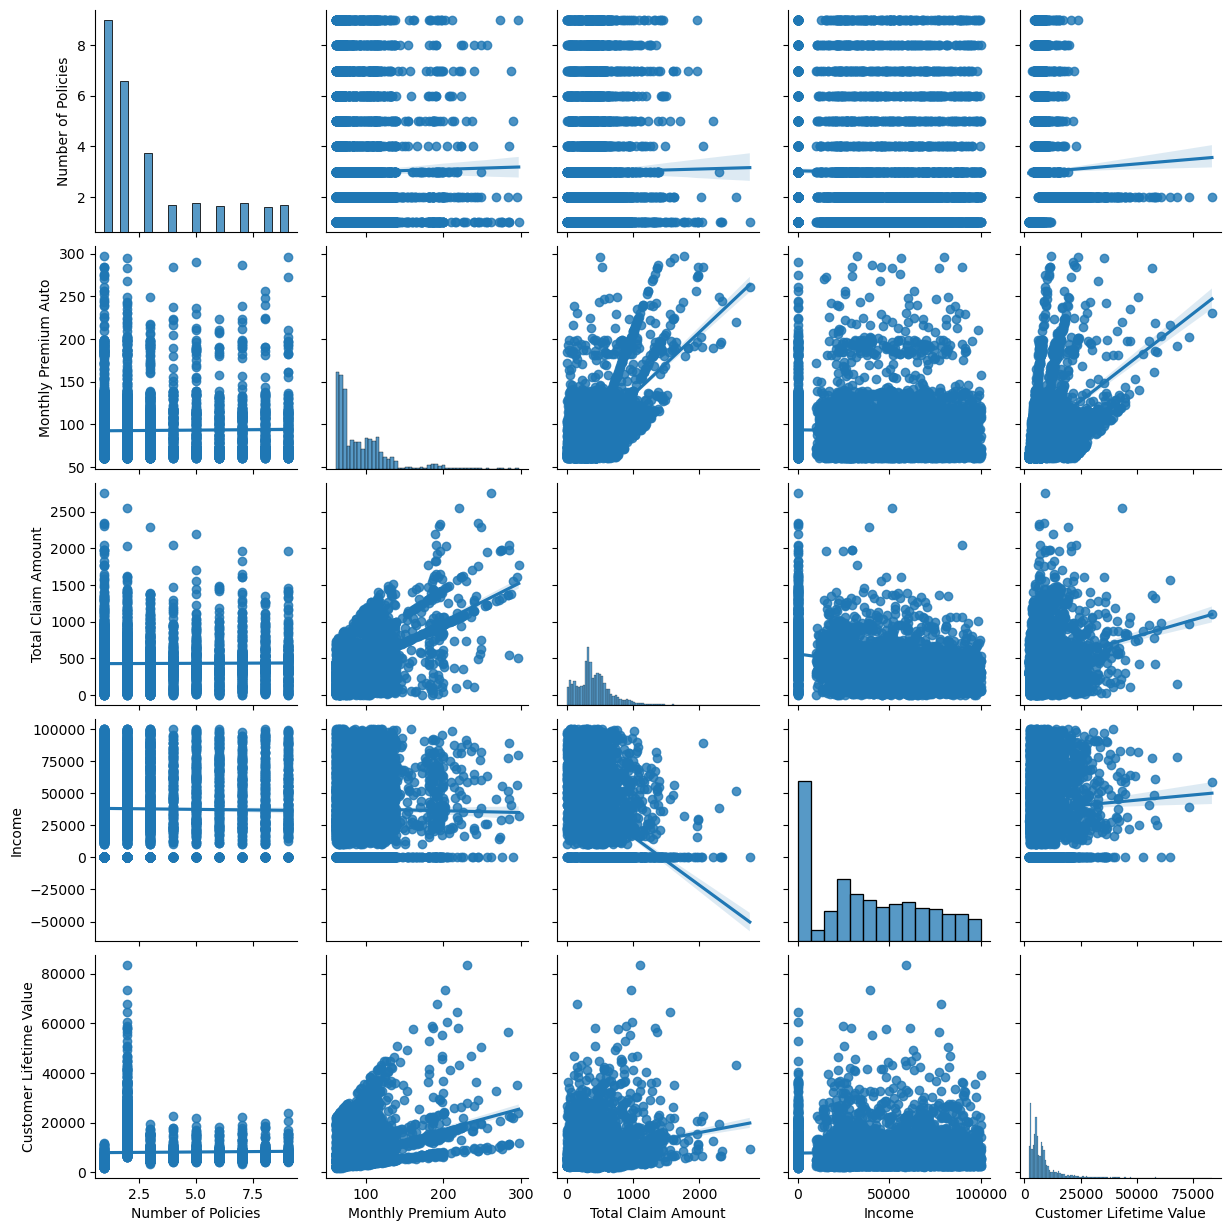

In [41]:
sns.pairplot(data=df, kind = 'reg');

Insight pairplot:

1. Korelasi `Monthly Premium Auto` vs `Total Claim Amount`
- Ditemukan korelasi **positif moderate**
- Menunjukkan bahwa semakin besar premi bulanan, semakin besar pula total klaim yang terjadi
- Secara bisnis, hal ini masuk akal karena premi tinggi biasanya mencerminkan nilai pertanggungan yang besar

---
2. engaruh `Monthly Premium Auto` terhadap `Customer Lifetime Value (CLV)`
- Terdapat korelasi **positif moderate** 
- Pelanggan dengan premi bulanan lebih tinggi cenderung memiliki nilai CLV yang lebih besar
- Mengindikasikan bahwa mereka adalah pelanggan bernilai tinggi yang penting untuk retensi

---

3. `Income` tidak berkorelasi kuat dengan `CLV` atau `Claim Amount`
- Distribusi data menyebar acak, tidak menunjukkan pola hubungan yang jelas
- Insight: Pendapatan pelanggan bukan faktor utama dalam menentukan klaim atau nilai CLV


# 5. Modeling
Proses modeling mencakup:
1. Define feature dan target
2. Train test spliting
3. Data preprocessing
4. Mencari model terbaik
5. Hyperparameter tuning
6. Feature selection
7. Model interpretation


## 5.1. Define X dan y

In [42]:

y = df['Customer Lifetime Value']
X = df.drop(columns=['Customer Lifetime Value'])


- X adalah feature, feature mencakup kolom `Vehicle Class`, `Coverage`, `Renew Offer Type`, `Employment Status`, `Marital Status`, `Education`, `Number of Policies`, `Monthly Premium Auto`, `Total Claim Amount`, dan `Income`.
- y adalah kolom target yang ingin di prediksi. kolom target pada data ini adalah Customer lifetime Value(CLV)

## 5.2. Train Test Spliting

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.3. Data Pre-Processing dan Model Benchmark
**Tahap preprocessing yang dilakukan adalah Encoding dan scaling.**
- **Encoding**
Encoding adalah proses mengubah data kategorikal (non-numerik) menjadi bentuk numerik yang dapat diproses oleh algoritma machine learning.
- **Scaling**
Scaling adalah proses menstandarisasi rentang nilai fitur numerik untuk memastikan semua fitur berkontribusi secara adil dalam model machine learning

**Penjelasan Preprocessing Data**

**Encoding**
1. One-Hot Encoding
Kolom-kolom berikut diencode menggunakan **One-Hot Encoding** karena merupakan variabel kategorikal nominal (tidak memiliki urutan hierarki), kolom yang dilakukan one hot encoding yaitu:

- **`Renew Offer Type`**: Jenis penawaran pembaruan (contoh: "Offer1", "Offer2").
- **`Marital Status`**: Status pernikahan (contoh: "Married", "Single").
- **`Vehicle Class`**: Kelas kendaraan (contoh: "2 door car", "Luxury").
- **`EmploymentStatus`**: Status pekerjaan (contoh: "Employed", "Unemployed","Disable").

**Alasan**: One-Hot Encoding cocok untuk kategori nominal karena mengonversi setiap nilai unik menjadi kolom biner terpisah (0/1) tanpa membuat asumsi urutan.

---

2. Ordinal Encoding
Kolom-kolom berikut diencode secara **Ordinal** karena memiliki urutan/logika hierarki yang jelas. Kolom yang dilakukan ordinal yaitu:

- **`Coverage`**: Tingkat cakupan asuransi (contoh: "Basic" < "Extended" < "Premium").
- **`Education`**: Tingkat pendidikan (contoh: "High School" < "Bachelor" < "Master" < "Doctor").

**Alasan**: Nilai dalam kolom ini memiliki makna relatif (tinggi-rendah) sehingga ordinal encoding mempertahankan informasi urutan.

---
**Scaling**
1. Robust Scaling
Kolom-kolom berikut diskalakan menggunakan **Robust Scaler** karena mengandung outlier atau distribusi non-normal:

- **`Number of Policies`**: Jumlah polis.
- **`Monthly Premium Auto`**: Premi bulanan.
- **`Total Claim Amount`**: Total klaim.
- **`Income`**: Pendapatan.

**Alasan**: Robust Scaler (menggunakan median & IQR) lebih tahan terhadap outlier dibanding Min-Max atau Standard Scaler, cocok untuk data finansial yang sering memiliki skewness.

**Multicol**

Model **Gradient Boosting** (dan model berbasis pohon seperti Decision Tree, Random Forest, XGBoost, CatBoost) **tidak memiliki asumsi linieritas antar fitur** dan **tidak menggunakan koefisien regresi**. Oleh karena itu pada dataset ini tidak melakukan pengecekan multicol. 

In [44]:
lin_reg = LinearRegression()
knn = KNeighborsRegressor()
dt_reg = DecisionTreeRegressor()
catboost = CatBoostRegressor(verbose=0)
xgboost = xgb.XGBRegressor()
gradboost = GradientBoostingRegressor()
random_forest = RandomForestRegressor(random_state=0)
laso = Lasso()
ridge = Ridge()

# Column names
categorical_onehot = ['Renew Offer Type', 'Marital Status', 'Vehicle Class','EmploymentStatus']


ordinal_cols = ['Coverage','Education']

bmi_cols = ['Number of Policies','Monthly Premium Auto','Total Claim Amount', 'Income']



pipe_ordinal_scaling = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[['Extended', 'Basic', 'Premium'],['High School or Below', 'College', 'Master', 'Bachelor', 'Doctor']])),
    ('scaling', RobustScaler())
])

pipe_onehot_scaling = Pipeline([
   ('onehot', OneHotEncoder(drop='first', sparse_output=False)),
   ('scaling', RobustScaler())
])


transformer2 = ColumnTransformer([
    ('ordinal', pipe_ordinal_scaling, ordinal_cols),
    ('onehot', pipe_onehot_scaling, categorical_onehot),  # Gunakan pipeline yang sudah dibuat
    ('scale', RobustScaler(), bmi_cols)
], remainder='passthrough')



# list model
model = [lin_reg, knn,laso,ridge,dt_reg, random_forest, catboost,xgboost,gradboost]

# metrics
list_scorer = ['neg_mean_absolute_percentage_error', 'neg_mean_absolute_error']


# list kosong
list_mean_rmse = []
list_std_rmse = []

list_mean_mape = []
list_std_mape = []

list_mean_mae = []
list_std_mae = []

list_mean_r2= []
list_std_r2= []


list_all = []

# looping model dengan pipeline
for i in model:
    pipe_prep_model = Pipeline([('preprocesing', transformer2),('model',i)])
    crosval = cross_validate(estimator= pipe_prep_model, X = X_train, y = y_train, scoring=list_scorer, cv=5)

    list_all.append(crosval)

    list_mean_mape.append(crosval['test_neg_mean_absolute_percentage_error'].mean())
    list_std_mape.append(np.abs(crosval['test_neg_mean_absolute_percentage_error'].std()))
     
    list_mean_mae.append(crosval['test_neg_mean_absolute_error'].mean())
    list_std_mae.append(crosval['test_neg_mean_absolute_error'].std())
    



In [46]:
df_model_cv_before = pd.DataFrame()
df_model_cv_before['model'] = ['lin_reg', 'knn','laso','ridge','dt_reg', 'random_forest', 'catboost','xgboost','gradboost']



df_model_cv_before['mean_mape'] = list_mean_mape
df_model_cv_before['std_mape'] = list_std_mape

df_model_cv_before['mean_mae'] = list_mean_mae
df_model_cv_before['std_mae'] = list_std_mae



df_model_cv_before

,model,mean_mape,std_mape,mean_mae,std_mae
0,lin_reg,-0.595323,0.012604,-3940.605925,68.718687
1,knn,-0.583273,0.010419,-4018.971212,109.205425
2,laso,-0.595251,0.012453,-3939.321463,69.089964
3,ridge,-0.595323,0.012576,-3940.246235,68.898485
4,dt_reg,-0.144328,0.010887,-2016.215501,107.034421
5,random_forest,-0.124132,0.006715,-1706.000365,87.760646
6,catboost,-0.172956,0.005041,-1917.898925,80.191075
7,xgboost,-0.226445,0.009435,-2195.802938,96.060192
8,gradboost,-0.146453,0.005802,-1793.365878,86.667843


Penjelasan Ringkas Setiap Model Regresi

1. Linear Regression (`LinearRegression`)
Model regresi paling dasar yang mengasumsikan hubungan **linear** antara fitur dan target. Cocok untuk data sederhana, tetapi kurang efektif jika terdapat non-linearitas atau interaksi kompleks antar fitur.

---
2. K-Nearest Neighbors Regressor (`KNeighborsRegressor`)
Model non-parametrik yang memprediksi nilai target berdasarkan rata-rata dari **k tetangga terdekat**. Mudah dipahami dan diimplementasikan, namun kurang efisien pada dataset besar atau berdimensi tinggi.

---
3. Decision Tree Regressor (`DecisionTreeRegressor`)
Model berbasis pohon keputusan yang membagi data ke dalam **ruang-ruang keputusan** berdasarkan nilai fitur. Mampu menangkap hubungan non-linear, tetapi rawan **overfitting** jika tidak diberi batasan.

---
4. CatBoost Regressor (`CatBoostRegressor`)
Algoritma boosting dari Yandex yang unggul dalam menangani data dengan fitur kategorikal. CatBoost **secara otomatis mengolah fitur kategori** dan menghindari overfitting. Sangat efisien meskipun tanpa tuning ekstensif.

---
5. XGBoost Regressor (`xgb.XGBRegressor`)
Salah satu algoritma boosting paling populer dan sering digunakan dalam kompetisi data science. XGBoost mendukung **regularisasi**, menangani missing value, dan sangat efisien. Cocok untuk data besar dan kompleks.

---
6. Gradient Boosting Regressor (`GradientBoostingRegressor`)
Model boosting yang membangun pohon-pohon secara bertahap, dengan setiap pohon baru memperbaiki **kesalahan prediksi** dari model sebelumnya. Kuat dalam menangani pola kompleks, namun pelatihannya lebih lambat dibanding random forest.

---
7. Random Forest Regressor (`RandomForestRegressor`)
Model ensemble yang menggabungkan banyak pohon keputusan (dengan data acak dan fitur acak) untuk menghasilkan prediksi yang lebih stabil. **Mengurangi overfitting** dan memiliki performa yang kuat secara umum.

---
8. Lasso Regression (`Lasso`)
Regresi linear dengan **regularisasi L1** yang bisa mengecilkan koefisien hingga nol, secara efektif melakukan **feature selection otomatis**. Ideal ketika kita ingin menyederhanakan model dan menghilangkan fitur yang tidak penting.

---
9. Ridge Regression (`Ridge`)
Regresi linear dengan **regularisasi L2**, yang mengurangi besar koefisien tapi tidak menghilangkannya. Cocok ketika semua fitur dianggap penting namun ingin mencegah model terlalu kompleks (overfitting).



Top 4 Model Terbaik Dilihat Dari Nilai MAE dan MAPE
| Model | MAPE | MAE |
|-------|------|----|
| **1. Gradient Boosting** | 0.146 | 1793.27|
| **2. CatBoost** | 0.172 | 1917.89 |
| **3. Decisiom tree** | 0.144 | 2027.1 | 
| **4. Random Forest** | 0.124 | 1706.00 | 

Mencoba model Gradient boosting dan Random forest

In [33]:
pipe_gradboost = Pipeline([
    ('preprocessing', transformer2),
    ('model', random_forest)
])

# Fit di training set
pipe_gradboost.fit(X_train, y_train)

# Prediksi di train dan test
y_pred_train = pipe_gradboost.predict(X_train)
y_pred_test = pipe_gradboost.predict(X_test)

# Hitung MAPE
mape_train_before = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test_before = mean_absolute_percentage_error(y_test, y_pred_test)

mae_train_before = mean_absolute_error(y_train, y_pred_train)
mae_test_before= mean_absolute_error(y_test, y_pred_test)



Hanya menggunakan MAE dan MAPE karena:
   - MAE dan MAPE memberikan **insight praktis** yang mudah diinterpretasikan oleh tim non-teknis (seperti marketing dan manajemen).  
   - Metrik ini juga selaras dengan **estimasi kerugian aktual** dalam konteks monetisasi.

In [34]:
df_score = pd.DataFrame()
df_score['Model'] = ['Random Forest before tunning']
df_score["MAE Test"] = [mae_test_before]
df_score["MAE Train"] = [mae_train_before]
df_score["MAPE Test"] = [mape_test_before]
df_score["MAPE Train"] = [mape_train_before]

df_score

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,Random Forest before tunning,1600.32182,635.34034,0.12423,0.046543


insight: Model awal menggunakan random forest memiliki nilai MAE dan MAPE yang overfit. Hal ini dapat dilihat dari nilai test dan train yang memiliki selisih cukup jauh. Solusi dari masalah overfit dapat diatasi dengan melakukan hyperparameter tuning.

## 5.4.Hyperparameter Tuning
Hyperparameter tuning adalah eksperimen sistematis untuk:
- Mencari kombinasi hyperparameter yang menghasilkan model terbaik (misalnya dengan MAE terendah)
- Menghindari underfitting (model terlalu sederhana) atau overfitting (model terlalu kompleks)

In [ ]:

# Buat model
random_forest = RandomForestRegressor(random_state=42)

# Pipeline
pipe_rf = Pipeline([
    ('preprocessing', transformer2),  
    ('model', random_forest)
])

# Hyperparameter grid
hyperparameter = {
    'model__n_estimators': [100, 200],             
    'model__max_depth': [10, 15],                   
    'model__min_samples_split': [10, 20],           
    'model__min_samples_leaf': [5, 10],              
    'model__max_features': ['sqrt', 0.3] 
}


# GridSearchCV
grid_model = GridSearchCV(
    estimator=pipe_rf,  
    param_grid=hyperparameter,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [36]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(categories=[['Extended',
                                                                                                                      'Basic',
                                                                                                                      'Premium'],
                                                                                                                     ['High '
                                                                                                                      'School '
                                                                                                                      'or '
                                                                                                                      'Below',
                                                                                                                      'College',
                                                                                                                      'Master',
                                                                                                                      'Bachelor',
                                                                                                                      'Doctor']])),
                                                                                         ('scaling',
                                                                                          RobustScaler())]),
                                                                         ['Coverage',
                                                                          'Education']),
                                                                        ('onehot',
                                                                         Pi...
                                                                          'Monthly '
                                                                          'Premium '
                                                                          'Auto',
                                                                          'Total '
                                                                          'Claim '
                                                                          'Amount',
                                                                          'Income'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 15],
                         'model__max_features': ['sqrt', 0.3],
                         'model__min_samples_leaf': [5, 10],
                         'model__min_samples_split': [10, 20],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [37]:
grid_model.best_score_

-0.14357035397802426

In [38]:
grid_model.best_params_

{'model__max_depth': 15,
 'model__max_features': 0.3,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 10,
 'model__n_estimators': 100}

In [39]:
best_model = grid_model.best_estimator_

best_model.fit(X_train, y_train)

# predict
y_pred_test_after = best_model.predict(X_test)
y_pred_train_after = best_model.predict(X_train)

# scoring


mae_test_after = mean_absolute_error(y_test, y_pred_test_after)
mae_train_after = mean_absolute_error(y_train, y_pred_train_after)

mape_test_after = mean_absolute_percentage_error(y_test, y_pred_test_after)
mape_train_after = mean_absolute_percentage_error(y_train, y_pred_train_after)



In [40]:
df_score_tuning = pd.DataFrame()
df_score_tuning['Model'] = ['Random Forest after tunning']

df_score_tuning["MAE Test"] = [mae_test_after]
df_score_tuning["MAE Train"] = [mae_train_after]
df_score_tuning["MAPE Test"] = [mape_test_after]
df_score_tuning["MAPE Train"] = [mape_train_after]

df_score_tuning

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,Random Forest after tunning,1712.683534,1458.894361,0.141554,0.11517


In [41]:
df_compare = pd.concat([df_score_tuning,df_score],axis=0)
df_compare

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,Random Forest after tunning,1712.683534,1458.894361,0.141554,0.115170
0,Random Forest before tunning,1600.321820,635.340340,0.124230,0.046543


Insight Evaluasi Model Random Forest: Sebelum vs Sesudah Hyperparameter Tuning

1. Performa Model pada Data Test Sebelum dan Sesudah Tuning Menurun
- **MAE Test** meningkat dari **1600.32** → **1712.68**
- **MAPE Test** meningkat dari **12.24%** → **14.15%**

Artinya, performa model pada data yang tidak terlihat (test set) menjadi **kurang baik setelah tuning**.

2. Performa Model pada Data Train Meningkat Drastis
- **MAE Train** naik dari **635.34** → **1458.89**
- **MAPE Train** naik dari **4.65%** → **11.51%**

Hal ini menunjukkan bahwa model hasil tuning **tidak terlalu fokus menghafal data train**, dan cenderung **lebih general**.

3. Overfitting Berkurang
- **Gap MAE** antara train dan test menurun drastis:

**Perbandingan Selisih MAE (Test vs Train)**
**1. Sebelum Tuning**
- **MAE Test** = `1600.32`  
- **MAE Train** = `635.34`  
- **Selisih (Overfitting)** = `1600.32 - 635.34 = **964.98**`  
**2. Sesudah Tuning**
- **MAE Test** = `1712.68`  
- **MAE Train** = `1458.89`  
- **Selisih (Overfitting)** = `1712.68 - 1458.89 = **253.79**`  

---

**Interpretasi**
1. **Sebelum Tuning**:  
   - Selisih sangat besar (`964.98`) → **Model overfitting parah** (performansi di train data jauh lebih baik daripada test data).  

2. **Sesudah Tuning**:  
   - Selisih berkurang drastis (`253.79`) → **Overfitting terkontrol**, model lebih generalisasi.  



Artinya model setelah tuning menjadi **lebih seimbang** dan **tidak overfit**, walau dengan sedikit trade-off di performa test.

---

Kesimpulan
- Meskipun performa test set terlihat menurun, **hyperparameter tuning berhasil mengurangi overfitting secara signifikan**.
- Mencoba model lain yaitu Gradien Boosting untuk mencari model yang stabil 


In [42]:
pipe_gradboost = Pipeline([
    ('preprocessing', transformer2),
    ('model', gradboost)
])

# Fit di training set
pipe_gradboost.fit(X_train, y_train)

# Prediksi di train dan test
y_pred_train = pipe_gradboost.predict(X_train)
y_pred_test = pipe_gradboost.predict(X_test)

# Hitung MAPE
mape_train_before = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test_before = mean_absolute_percentage_error(y_test, y_pred_test)

mae_train_before = mean_absolute_error(y_train, y_pred_train)
mae_test_before= mean_absolute_error(y_test, y_pred_test)


In [43]:
df_score = pd.DataFrame()
df_score['Model'] = ['Gradient boosting before tunning']
df_score["MAE Test"] = [mae_test_before]
df_score["MAE Train"] = [mae_train_before]
df_score["MAPE Test"] = [mape_test_before]
df_score["MAPE Train"] = [mape_train_before]

df_score

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,Gradient boosting before tunning,1699.361074,1611.949553,0.140632,0.130031


1. **Konsistensi Performa**:
   - Perbedaan MAE train-test hanya **~5.6%** (1700 vs 1611)
   - Perbedaan MAPE train-test hanya **~8.4%** (14.08% vs 13.00%)
   - Menunjukkan model tidak mengalami overfitting yang parah

2. **Akurasi Model**:
   - MAPE test **14.08%** berarti rata-rata kesalahan prediksi adalah ±14% dari nilai aktual
   - Dalam banyak kasus bisnis (terutama asuransi), MAPE < 15% dapat dianggap cukup baik untuk baseline model

3. **Potensi Improvement**:
   - **Gap train-test** yang ada (meski kecil) mengindikasikan:
     - Kemungkinan minor overfitting
   - Nilai absolut MAE (±1700) perlu dinilai berdasarkan skala variabel target:
     - Jika rata-rata klaim adalah 10,000, MAE 1700 = 17% error
     - Jika rata-rata klaim 100,000, MAE 1700 = 1.7% error

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Buat model
gradboost = GradientBoostingRegressor(random_state=42)

# Pipeline
pipe_gb = Pipeline([
    ('preprocessing', transformer2),
    ('model', gradboost)
])

# Hyperparameter grid
hyperparameter = {
    'model__n_estimators': [100, 200],             
    'model__learning_rate': [0.01, 0.05, 0.1],      
    'model__max_depth': [3, 5],                     
    'model__min_samples_split': [10, 20],            
    'model__min_samples_leaf': [5, 10],              
    'model__subsample': [0.8, 1.0],                 
    'model__loss': ['squared_error']                
}
# GridSearchCV
grid_model = GridSearchCV(
    estimator=pipe_gb,  # <- GANTI di sini
    param_grid=hyperparameter,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [45]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         Pipeline(steps=[('ordinal',
                                                                                          OrdinalEncoder(categories=[['Extended',
                                                                                                                      'Basic',
                                                                                                                      'Premium'],
                                                                                                                     ['High '
                                                                                                                      'School '
                                                                                                                      'or '
                                                                                                                      'Below',
                                                                                                                      'College',
                                                                                                                      'Master',
                                                                                                                      'Bachelor',
                                                                                                                      'Doctor']])),
                                                                                         ('scaling',
                                                                                          RobustScaler())]),
                                                                         ['Coverage',
                                                                          'Education']),
                                                                        ('onehot',
                                                                         Pi...
                                                                          'Total '
                                                                          'Claim '
                                                                          'Amount',
                                                                          'Income'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__loss': ['squared_error'],
                         'model__max_depth': [3, 5],
                         'model__min_samples_leaf': [5, 10],
                         'model__min_samples_split': [10, 20],
                         'model__n_estimators': [100, 200],
                         'model__subsample': [0.8, 1.0]},
             verbose=1)

In [46]:
grid_model.best_score_

0.687258016541295

In [47]:
grid_model.best_params_

{'model__learning_rate': 0.05,
 'model__loss': 'squared_error',
 'model__max_depth': 3,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 10,
 'model__n_estimators': 100,
 'model__subsample': 0.8}

In [48]:
grid_model.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Extended',
                                                                                               'Basic',
                                                                                               'Premium'],
                                                                                              ['High '
                                                                                               'School '
                                                                                               'or '
                                                                                               'Below',
                                                                                               'College',
                                                                                               'Master',
                                                                                               'Bachelor',
                                                                                               'Doctor']])),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  ['Coverage', 'Education']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneH...t',
                                                                                 sparse_output=False)),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  ['Renew Offer Type',
                                                   'Marital Status',
                                                   'Vehicle Class',
                                                   'EmploymentStatus']),
                                                 ('scale', RobustScaler(),
                                                  ['Number of Policies',
                                                   'Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           min_samples_leaf=10,
                                           min_samples_split=10,
                                           random_state=42, subsample=0.8))])

In [49]:
best_model = grid_model.best_estimator_

best_model.fit(X_train, y_train)

# predict
y_pred_test_after = best_model.predict(X_test)
y_pred_train_after = best_model.predict(X_train)

# scoring


mae_test_after = mean_absolute_error(y_test, y_pred_test_after)
mae_train_after = mean_absolute_error(y_train, y_pred_train_after)

mape_test_after = mean_absolute_percentage_error(y_test, y_pred_test_after)
mape_train_after = mean_absolute_percentage_error(y_train, y_pred_train_after)


In [50]:
df_score_tuning = pd.DataFrame()
df_score_tuning['Model'] = ['gradient after tunning']

df_score_tuning["MAE Test"] = [mae_test_after]
df_score_tuning["MAE Train"] = [mae_train_after]
df_score_tuning["MAPE Test"] = [mape_test_after]
df_score_tuning["MAPE Train"] = [mape_train_after]

df_score_tuning

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,gradient after tunning,1636.253195,1649.556057,0.135514,0.130715


In [51]:
df_compare = pd.concat([df_score_tuning,df_score],axis=0)
df_compare

,Model,MAE Test,MAE Train,MAPE Test,MAPE Train
0,gradient after tunning,1636.253195,1649.556057,0.135514,0.130715
0,Gradient boosting before tunning,1699.361074,1611.949553,0.140632,0.130031


**Analisis Performa Model: Sebelum vs Sesudah**

| **Metric**        | **Sebelum**           | **Sesudah**           | **Insight**                                                                 |
|-------------------|------------------------|------------------------|------------------------------------------------------------------------------|
| **MAE Test**      | $1700.79               | $1636.25              | Terjadi *penurunan error* sebesar **$65.82**, menandakan peningkatan akurasi model pada data uji. |
| **MAE Train**     | $1611.94               | $1649.55              | Sedikit *kenaikan error* pada data latih (**+$37.61**), namun masih dalam batas wajar. |
| **MAPE Test**     | 14.08%                 | 13.55%                | *Penurunan error relatif* sebesar **0.54%**, menunjukkan model sesudah lebih baik dalam generalisasi. |
| **MAPE Train**    | 13.00%                 | 13.07%                | *Sedikit peningkatan* error relatif (**+0.07%**) pada data latih, kemungkinan sebagai dampak regularisasi. |



**Kesimpulan Insight:**
- Model **sesudah** menunjukkan **performa yang lebih baik pada data uji** baik dari segi MAE maupun MAPE, yang berarti generalisasi model membaik.
- **Slight overfitting sebelumnya berkurang**, ditunjukkan dengan selisih error train dan test yang lebih seimbang.


**Rekomendasi:** Lanjutkan pendekatan/model yang digunakan sesudah hyperparameter tunning.


Perbandingan Estimasi Kerugian Finansial (Sebelum vs Sesudah)

Data
| Keterangan          | Nilai         |
|---------------------|---------------|
| **MAE Test Sebelum**| `$1,700.79`   |
| **MAE Test Sesudah**| `$1,636.25`   |
| **Jumlah Transaksi**| `500`         |

---

Rumus Perhitungan
\[
\text{Estimasi Kerugian} = \text{MAE} \times \text{Jumlah Transaksi}
\]

---

Perhitungan

1. Sebelum Perbaikan Model
\[
1,700.79 \times 500 = \$850,395.00
\]

2. Sesudah Perbaikan Model
\[
1,636.25 \times 500 = \$818,125.00
\]

3. Penghematan Potensial
\[
850,395.00 - 818,125.00 = \$32,270.00
\]

---

**Kesimpulan**
- Model hasil tuning berpotensi **mengurangi kerugian finansial sebesar `$32,270.00`** untuk 500 transaksi.
- Ini memperkuat insight bahwa **peningkatan akurasi model berdampak langsung terhadap efisiensi bisnis**.
- Model sesudah tuning tidak hanya unggul dari sisi metrik (MAE & MAPE), tapi juga **secara nyata memberikan nilai bisnis** melalui penghematan kerugian prediksi CLV.




## 5.6.Feature Selection

In [52]:
best_model['model'].feature_importances_

array([2.90160181e-04, 2.22560528e-03, 7.82962352e-05, 2.18227442e-05,
       0.00000000e+00, 2.32364974e-03, 1.37003744e-04, 3.36687610e-04,
       4.05199195e-04, 1.54127779e-04, 1.70864086e-03, 0.00000000e+00,
       4.06931829e-04, 2.09594305e-04, 0.00000000e+00, 6.74866124e-06,
       6.67515809e-01, 3.12316065e-01, 3.03427527e-03, 8.82938269e-03])

In [53]:
best_model['preprocessing']

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['Extended',
                                                                              'Basic',
                                                                              'Premium'],
                                                                             ['High '
                                                                              'School '
                                                                              'or '
                                                                              'Below',
                                                                              'College',
                                                                              'Master',
                                                                              'Bachelor',
                                                                              'Doctor']])),
                                                 ('scaling', RobustScaler())]),
                                 ['Coverage', 'Education']),
                                ('onehot',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False)),
                                                 ('scaling', RobustScaler())]),
                                 ['Renew Offer Type', 'Marital Status',
                                  'Vehicle Class', 'EmploymentStatus']),
                                ('scale', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income'])])

In [54]:
best_model['preprocessing'].transformers_[0][2]

['Coverage', 'Education']

In [55]:
list(best_model['preprocessing'].transformers_[1][1].get_feature_names_out())

['Renew Offer Type_Offer2',
 'Renew Offer Type_Offer3',
 'Renew Offer Type_Offer4',
 'Marital Status_Married',
 'Marital Status_Single',
 'Vehicle Class_Luxury Car',
 'Vehicle Class_Luxury SUV',
 'Vehicle Class_SUV',
 'Vehicle Class_Sports Car',
 'Vehicle Class_Two-Door Car',
 'EmploymentStatus_Employed',
 'EmploymentStatus_Medical Leave',
 'EmploymentStatus_Retired',
 'EmploymentStatus_Unemployed']

In [56]:
list(X[best_model['preprocessing'].transformers_[2][2]])

['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

In [57]:
feat_scale = best_model['preprocessing'].transformers_[0][2]
feat_onehot = list(best_model['preprocessing'].transformers_[1][1].get_feature_names_out())
feat_remainder = list(X[best_model['preprocessing'].transformers_[2][2]])

feat = feat_scale + feat_onehot + feat_remainder
feat

['Coverage',
 'Education',
 'Renew Offer Type_Offer2',
 'Renew Offer Type_Offer3',
 'Renew Offer Type_Offer4',
 'Marital Status_Married',
 'Marital Status_Single',
 'Vehicle Class_Luxury Car',
 'Vehicle Class_Luxury SUV',
 'Vehicle Class_SUV',
 'Vehicle Class_Sports Car',
 'Vehicle Class_Two-Door Car',
 'EmploymentStatus_Employed',
 'EmploymentStatus_Medical Leave',
 'EmploymentStatus_Retired',
 'EmploymentStatus_Unemployed',
 'Number of Policies',
 'Monthly Premium Auto',
 'Total Claim Amount',
 'Income']

In [58]:
coba = best_model['model'].feature_importances_
coba

array([2.90160181e-04, 2.22560528e-03, 7.82962352e-05, 2.18227442e-05,
       0.00000000e+00, 2.32364974e-03, 1.37003744e-04, 3.36687610e-04,
       4.05199195e-04, 1.54127779e-04, 1.70864086e-03, 0.00000000e+00,
       4.06931829e-04, 2.09594305e-04, 0.00000000e+00, 6.74866124e-06,
       6.67515809e-01, 3.12316065e-01, 3.03427527e-03, 8.82938269e-03])

In [59]:
best_model['model']

GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=10,
                          min_samples_split=10, random_state=42, subsample=0.8)

In [60]:
imp = pd.DataFrame({
    'feature': feat,  # gunakan nama fitur dari pipeline
    'importance': coba
})

# Drop fitur dengan importance = 0
imp = imp[imp['importance'] > 0].sort_values('importance', ascending=False)

imp


,feature,importance
16,Number of Policies,0.667516
17,Monthly Premium Auto,0.312316
19,Income,0.008829
18,Total Claim Amount,0.003034
5,Marital Status_Married,0.002324
1,Education,0.002226
10,Vehicle Class_Sports Car,0.001709
12,EmploymentStatus_Employed,0.000407
8,Vehicle Class_Luxury SUV,0.000405
7,Vehicle Class_Luxury Car,0.000337


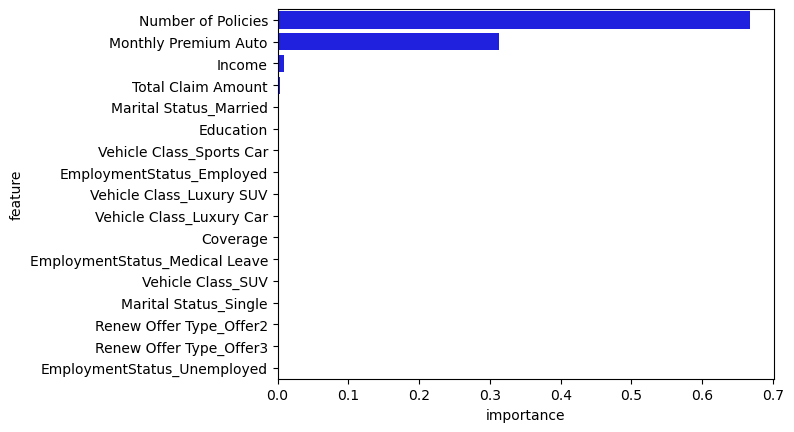

In [61]:
sns.barplot(data=imp, y='feature', x='importance', color='b');

Analisis Feature Importance pada Model Gradient Boosting

Fitur Dominan
Berdasarkan grafik feature importance, terdapat **3 fitur utama** yang paling berpengaruh:
1. `Number of policies`  
2. `Monthly premium auto`  
3. `Income`  

Fitur-fitur ini secara konsisten memberikan kontribusi tinggi dalam prediksi target.

Strategi Feature Selection

Opsi 1: Reduksi Fitur *(Interpretability Focus)*
**Keuntungan**:
- Model lebih sederhana dan mudah diinterpretasi
- Mengurangi risiko overfitting jika fitur lain sangat noisy
- Efisiensi komputasi (training lebih cepat)

Opsi 2: Pertahankan Semua Fitur *(Performance Focus)

**Keuntungan Gradient Boosting**:
- Algoritma GB/XGBoost/LightGBM secara otomatis:
  - Menetapkan importance ≈ 0 untuk fitur tidak relevan
  - Robust terhadap fitur redundan atau noise
- Mampu menangkap interaksi non-linear dari fitur minor

**Kesimpulan** : Feature pada model bisa diubah menjadi 3. Namun,secara umum Gradient Boosting (seperti GradientBoostingRegressor, XGBoost, LightGBM, dll.) tidak wajib melakukan feature selection.


Save Model

In [62]:
import joblib

In [65]:
# fit
best_model.fit(X, y)

# save model
joblib.dump(best_model, 'best_model_gradboost_joblib')

['best_model_gradboost_joblib']

In [66]:
model_loaded_joblib = joblib.load('best_model_gradboost_joblib')
model_loaded_joblib

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['Extended',
                                                                                               'Basic',
                                                                                               'Premium'],
                                                                                              ['High '
                                                                                               'School '
                                                                                               'or '
                                                                                               'Below',
                                                                                               'College',
                                                                                               'Master',
                                                                                               'Bachelor',
                                                                                               'Doctor']])),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  ['Coverage', 'Education']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneH...t',
                                                                                 sparse_output=False)),
                                                                  ('scaling',
                                                                   RobustScaler())]),
                                                  ['Renew Offer Type',
                                                   'Marital Status',
                                                   'Vehicle Class',
                                                   'EmploymentStatus']),
                                                 ('scale', RobustScaler(),
                                                  ['Number of Policies',
                                                   'Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05,
                                           min_samples_leaf=10,
                                           min_samples_split=10,
                                           random_state=42, subsample=0.8))])

## 5.7.Model Interpretation 

In [67]:
import shap

In [68]:
# **Hanya fit dan transform pada data training**
X_train_transformed = transformer2.fit_transform(X_train)

# **Hanya transform pada data test (tanpa fitting ulang)**
X_test_transformed = transformer2.transform(X_test)


### SHAP

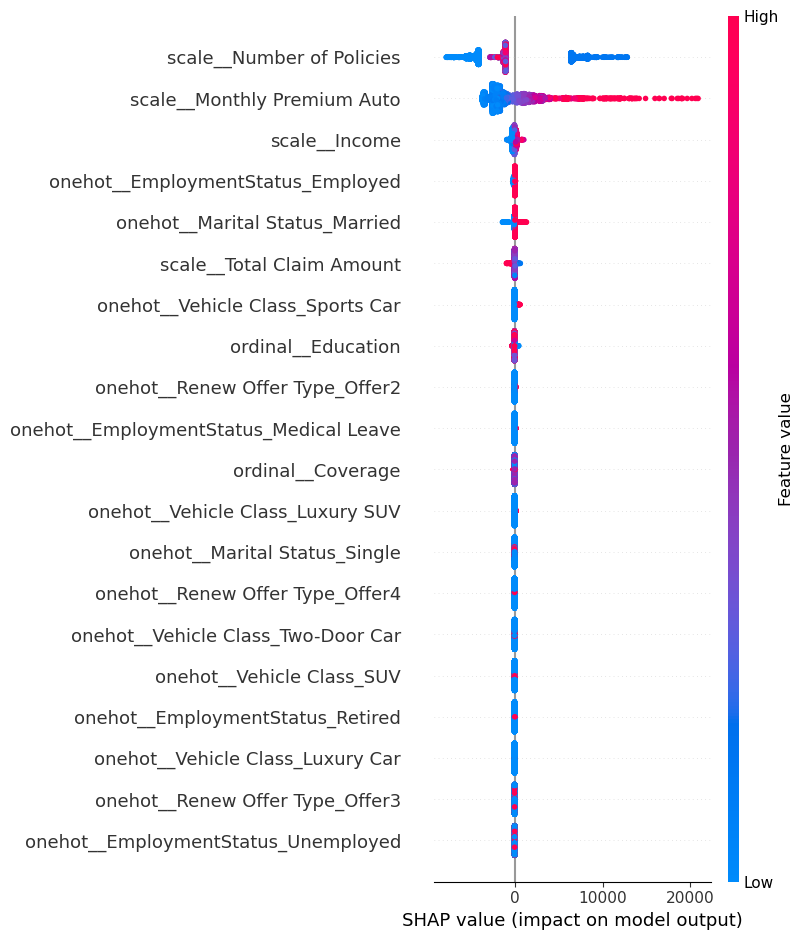

In [69]:
# 1. Ambil bagian preprocessing dan model dari pipeline
preprocessor = best_model.named_steps['preprocessing']
model = best_model.named_steps['model']

# 2. Transformasikan X_train
X_train_transformed = preprocessor.transform(X_train)

# 3. Gunakan TreeExplainer hanya pada model pohon
explainer = shap.Explainer(model, X_train_transformed)

# 4. Hitung SHAP values
shap_values = explainer(X_train_transformed)

# 5. Dapatkan nama fitur (kalau preprocessor mendukung)
feature_names = preprocessor.get_feature_names_out()

# 6. Buat SHAP summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)


`Number of Policies` dan `Monthly Premium Auto` menampilkan variasi SHAP value yang signifikan, mengindikasikan pengaruh kuat terhadap hasil prediksi model. Fitur-fitur lain seperti `income`juga memberikan kontribusi meskipun tidak sebesar kedua fitur utama tersebut.

Temuan ini dapat dimanfaatkan untuk menyusun strategi bisnis yang lebih efektif, contohnya dengan mengoptimalkan penawaran produk berdasarkan Monthly Premium Auto atau merancang program insentif khusus bagi pelanggan yang memiliki lebih banyak polis asuransi.

In [70]:
best_model[-1]

GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=10,
                          min_samples_split=10, random_state=42, subsample=0.8)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Actual Vs Prediction of CLV Pot

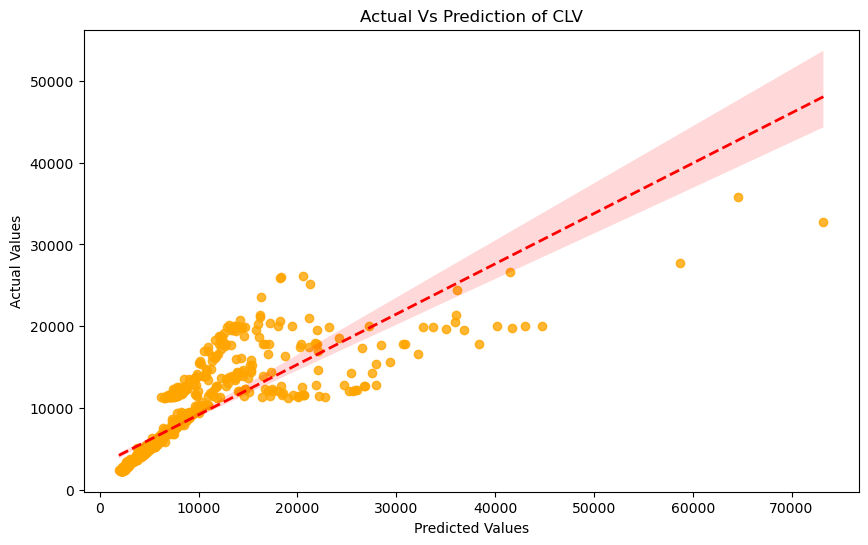

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x=y_test, y=y_pred_test_after, color='orange', ax=ax, line_kws={'color':'red', 'lw':2, 'alpha':1, 'ls':'--'})

ax.set_title('Actual Vs Prediction of CLV')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

plt.show()

### Residual Plot

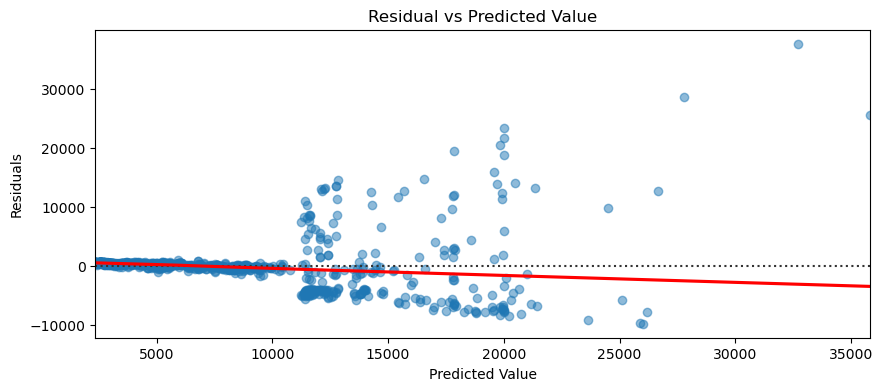

In [73]:
# Calculate residuals
residuals = y_test - y_pred_test_after

# Create residual plot
plt.figure(figsize=(10, 4))
plot = sns.residplot(
    x=y_pred_test_after,
    y=residuals,
    lowess=True,                           
    scatter_kws={'alpha': 0.5},
    line_kws={'color':'red'}             
)

plot.set_title('Residual vs Predicted Value')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residuals')

plt.show()


**Analisis Error Prediksi**

Plot residual di atas memperlihatkan perbedaan antara nilai sebenarnya (y_test) dengan hasil prediksi model (y_pred_Test_after). Berikut temuan kunci dari visualisasi tersebut:

**Pola Sebaran Error**
- Untuk nilai CLV rendah hingga sedang, error cenderung terkumpul di sekitar nol, menunjukkan akurasi prediksi yang baik pada rentang ini
- Namun pada nilai CLV tinggi, error menjadi lebih tersebar dan tidak konsisten

**Masalah Heteroskedastisitas**
- Terdapat kecenderungan error yang melebar seiring peningkatan nilai prediksi CLV

**Fenomena ini mengindikasikan:**
- Ketidakstabilan performa model pada pelanggan bernilai CLV tinggi


Implikasi: Model memerlukan penyempurnaan khususnya dalam menangani pelanggan dengan nilai CLV besar, baik melalui teknik transformasi data maupun pendekatan modeling yang lebih robust.

# 6. Kesimpulan

**Kesimpulan Akhir**

Model prediktif **Customer Lifetime Value (CLV)** berhasil dikembangkan dengan memanfaatkan data pelanggan dan informasi polis asuransi. Model terbaik diperoleh menggunakan algoritma **Gradient Boosting** setelah melalui proses **hyperparameter tuning**.

**Performa Model**

Model Gradient Boosting menunjukkan hasil terbaik dari seluruh metrik evaluasi:

| Metric       | Train         | Test          |
|--------------|---------------|---------------|
| MAE          | $1,649.55     | $1,636.25     |
| MAPE         | 13.07%        | 13.55%        |

Evaluasi ini menunjukkan bahwa model memiliki **akurasi yang baik dan stabil**, dengan perbedaan performa antara data latih dan uji yang kecil. Hal ini menandakan bahwa **model mampu melakukan generalisasi dengan baik dan minim overfitting**.

---

**Dampak Strategis CLV**

Ketepatan dalam memprediksi CLV memiliki dampak langsung terhadap **efisiensi strategi bisnis** perusahaan. Tanpa mempertimbangkan CLV dalam keputusan retensi atau pemasaran, perusahaan dapat:

- Mengalokasikan sumber daya kepada pelanggan dengan nilai jangka panjang yang rendah.
- Kehilangan peluang mempertahankan pelanggan bernilai tinggi.
- Mengalami potensi kerugian akibat keputusan yang tidak berbasis data.

Dengan model ini, perusahaan dapat lebih **selektif, efisien, dan berbasis data** dalam mempertahankan pelanggan serta mengoptimalkan anggaran pemasaran.

---

**Fitur yang Paling Mempengaruhi CLV**

Berdasarkan hasil analisis menggunakan **SHAP values** dan **feature importance**, berikut adalah fitur-fitur paling berpengaruh terhadap prediksi CLV:

- `Number of Policies` — Jumlah polis yang dimiliki pelanggan.
- `Monthly Premium Auto` — Premi bulanan asuransi kendaraan.
- `Income` — Pendapatan pelanggan.

Fitur-fitur ini mencerminkan **tingkat keterlibatan pelanggan** dan **kapasitas finansial**, dua aspek penting dalam menentukan nilai seumur hidup pelanggan.

---

**Limitasi Model**

Meskipun model menunjukkan performa yang baik secara umum, terdapat **penurunan akurasi** pada prediksi **CLV ekstrem tinggi** (di atas $15.000). Error pada segmen ini cenderung lebih besar dan tidak konsisten.

>*Implikasinya*: Diperlukan pendekatan tambahan—seperti segmentasi pelanggan atau model khusus untuk outlier—agar prediksi pada pelanggan bernilai sangat tinggi menjadi lebih andal.


# 7. Rekomendasi

**Rekomendasi Strategis untuk Perusahaan Asuransi**
1. Fokuskan upaya retensi, upselling, dan cross-selling pada segmen dengan CLV tinggi.

2. Optimalkan Penawaran Berdasarkan Fitur Penting
Berdasarkan hasil SHAP dan feature importance, fitur-fitur seperti Number of Policies, Monthly Premium Auto, dan Income. Penawaran dapat berupa:
- Menawarkan bundling produk atau insentif kepada pelanggan dengan jumlah polis lebih banyak.
- Meninjau kembali struktur premi agar tetap menarik untuk pelanggan berpotensi tinggi.
- Menyesuaikan penawaran produk berdasarkan daya beli pelanggan (Income).

3. Bangun Strategi Khusus untuk Pelanggan CLV Tinggi. Model saat ini memiliki akurasi yang menurun pada nilai CLV ekstrem (>15.000).
- Lakukan analisis tambahan atau pendekatan manual untuk segmen ini.
- Pertimbangkan membangun model terpisah khusus untuk high-value clients.



**Kesimpulan**
Model Gradient Boost yang telah dituning memberikan prediksi CLV yang stabil dan akurat pada rentang nilai umum. Untuk memaksimalkan dampak bisnis, perusahaan disarankan untuk mengintegrasikan model ini ke dalam strategi manajemen pelanggan dan terus mengembangkan data serta pendekatan untuk pelanggan bernilai tinggi.